# От данных к ML-продукту: полный цикл разработки

## 1. Введение и постановка бизнес-задачи

### 🎯 Бизнес-кейс: прогнозирование спроса в ритейле

Наш клиент — сеть супермаркетов "ДатаМаркет", которая хочет оптимизировать запасы товаров. 
Руководство сети столкнулось с двумя проблемами:
- Товары часто заканчиваются на полках (потеря продаж)
- Избыточные запасы некоторых товаров (замороженные деньги и списания)

**Нам поставили задачу:** разработать систему прогнозирования спроса на товары, чтобы:
1. Снизить количество out-of-stock ситуаций на 20%
2. Уменьшить объем списаний на 15%
3. Оптимизировать логистику и закупки

### 👥 Стейкхолдеры и пользователи системы

- **CEO компании** — хочет видеть общие метрики эффективности
- **Категорийные менеджеры** — планируют закупки на основе прогнозов
- **Руководители магазинов** — распределяют товары по полкам
- **Логисты** — оптимизируют поставки между складами и магазинами
- **Аналитики** — изучают тренды и сезонность спроса

### 📊 Источники данных и существующая инфраструктура

У клиента есть следующие данные:
- История продаж за последние 2 года (хранится в PostgreSQL)
- Данные о ценах и промо-акциях
- Информация о праздниках и выходных днях
- Погодные данные для каждого региона

Данные обновляются ежедневно, и система должна обновлять прогнозы с такой же частотой.

## 2. Архитектура решения

Наша система будет состоять из следующих компонентов:

1. **База данных** (PostgreSQL) — источник данных о продажах
2. **ML-модель** — сердце системы, прогнозирующее спрос
3. **REST API** — интерфейс для получения прогнозов
4. **Веб-дашборд** — визуализация продаж
5. **Десктопное приложение** — для работы без интернета
6. **Docker-контейнеры** — для упаковки и легкого деплоя

## 3. Технологический стек

Для реализации проекта будем использовать:

| Компонент | Технологии |
|-----------|------------|
| Хранение данных | PostgreSQL |
| Версионирование | Git |
| ML-модель | scikit-learn, pandas |
| API | FastAPI |
| Дашборд | Plotly Dash |
| Десктопное приложение | PyQt |
| Контейнеризация | Docker |

### План действий

1. Создадим Git-репозиторий и настроим окружение
2. Подготовим данные в PostgreSQL
3. Разработаем собственную библиотеку для работы с данными
4. Создадим и обучим модель прогнозирования
5. Разработаем API для доступа к модели
6. Создадим интерактивный дашборд
7. Упакуем решение в Docker-контейнеры
8. Познакомимся с возможностями деплоя в облако
9. Разработаем десктопное приложение

# Работа с Git и данными

## 1. Настройка Git-репозитория

Git — это система контроля версий, которая позволяет отслеживать изменения в коде. В проектах по анализу данных Git не менее важен, чем в обычной разработке.

### Работа в терминале

В этом модуле мы будем активно использовать командную строку (терминал). Если вы раньше не работали с терминалом — не волнуйтесь, мы все подробно объясним!

> 💡 **Примечание:** Команды ниже нужно вводить в терминале. В Windows это может быть PowerShell, Command Prompt или Git Bash, в macOS и Linux — Terminal или другой эмулятор терминала.

### Основные команды терминала:

- `mkdir` — создание директории (Make DIRectory)
- `cd` — переход в директорию (Change Directory)
- `ls` или `dir` — просмотр содержимого директории (LiSt или DIRectory)
- `touch` — создание пустого файла (только в Unix/Linux/macOS)
- `echo` — вывод текста или запись в файл
- `cat` — просмотр содержимого файла (conCATenate)

### Создание репозитория и структуры проекта

Сначала инициализируем репозиторий и создадим основную структуру:


Создаем директорию проекта
```mkdir retail_demand_forecast```
`cd retail_demand_forecast`

Инициализируем Git
`git init`

Создаем структуру проекта
`mkdir -p data/raw data/processed
mkdir -p src/data src/models src/visualization
mkdir -p notebooks
mkdir -p app/api app/dashboard app/desktop
mkdir -p models`

Наша структура проекта будет выглядеть так:

retail_demand_forecast/
│
├── data/                # Директория для данных
│   ├── raw/             # Сырые данные
│   └── processed/       # Обработанные данные
│
├── src/                 # Исходный код
│   ├── data/            # Код для работы с данными
│   ├── models/          # Код для моделей
│   └── visualization/   # Код для визуализации
│
├── notebooks/           # Jupyter ноутбуки
│
├── app/                 # Приложения
│   ├── api/             # REST API
│   ├── dashboard/       # Веб-дашборд
│   └── desktop/         # Десктопное приложение
│
├── models/              # Сохраненные модели
│
└── README.md            # Описание проекта

💡 Объяснение: Флаг -p в команде mkdir создает все промежуточные директории автоматически. 

Создадим файл README.md:

In [ ]:
# Создаем README.md с описанием проекта
echo "# Прогнозирование спроса в ритейле" > README.md
echo "" >> README.md
echo "Проект по прогнозированию спроса на товары для сети супермаркетов." >> README.md

### Создание файла .gitignore


Файл .gitignore указывает Git, какие файлы игнорировать при отслеживании изменений.

Создадим его с помощью редактора:

В Windows:
`notepad .gitignore`

В macOS:
`open -a TextEdit .gitignore`

В Linux:
`gedit .gitignore  # или nano .gitignore, vim .gitignore и т.д.`

В открывшемся редакторе скопируйте и вставьте следующее содержимое:



Создадим пустые .gitkeep файлы, чтобы Git отслеживал пустые директории:



💡  Объяснение: Git не отслеживает пустые директории. Файлы .gitkeep — это соглашение,
которое позволяет нам добавлять пустые директории в репозиторий. 

### Первый коммит


Теперь давайте сохраним наши изменения в Git:



In [ ]:
# Добавляем все файлы в индекс
git add .

# Создаем коммит с сообщением
git commit -m "Initial project structure"

💡 Примечание: Если вы используете Git впервые, вам может потребоваться настроить ваше имя и email: 

In [ ]:
git config --global user.name "Ваше Имя"
git config --global user.email "ваш_email@example.com"

# Работа с базой данных в Docker


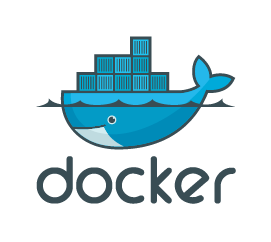


### Что такое Docker и зачем он нужен?

**Docker** — это платформа для разработки, доставки и запуска приложений в контейнерах. Контейнер — это легковесный, автономный, исполняемый пакет программного обеспечения, который включает всё необходимое для запуска приложения: код, среду выполнения, системные инструменты, библиотеки и настройки.


#### Преимущества Docker:

1. **Согласованность окружения** — "работает у меня" больше не проблема
2. **Изоляция** — приложения и их зависимости работают в собственных контейнерах, не мешая друг другу
3. **Переносимость** — контейнеры работают одинаково на любой платформе, поддерживающей Docker
4. **Масштабируемость** — легко создавать и уничтожать контейнеры по требованию
5. **Версионирование** — можно создавать снимки контейнеров на разных этапах разработки

#### Основные концепции Docker:

- **Образ (Image)** — шаблон, который содержит ОС, ПО и настройки
- **Контейнер (Container)** — запущенный экземпляр образа
- **Docker Hub** — репозиторий с готовыми образами
- **Dockerfile** — инструкция для сборки образа
- **Docker Compose** — инструмент для определения и запуска многоконтейнерных приложений

### Почему ставим БД через Docker, а не "по старинке"?

Традиционная установка PostgreSQL на рабочую машину имеет ряд недостатков:

1. **Сложность установки** — требуется настройка системы, решение конфликтов зависимостей
2. **Засорение системы** — установка добавляет множество файлов в разные директории
3. **Проблемы с версиями** — сложно поддерживать несколько версий одновременно
4. **Платформозависимость** — процесс установки отличается для Windows, macOS и Linux

### Почему ставим БД через Docker, а не "по старинке"?

Традиционная установка PostgreSQL на рабочую машину имеет ряд недостатков:

1. **Сложность установки** — требуется настройка системы, решение конфликтов зависимостей
2. **Засорение системы** — установка добавляет множество файлов в разные директории
3. **Проблемы с версиями** — сложно поддерживать несколько версий одновременно
4. **Платформозависимость** — процесс установки отличается для Windows, macOS и Linux

**Docker решает эти проблемы:**

1. **Быстрый старт** — БД запускается одной командой
2. **Изоляция** — БД работает в своем контейнере, не влияя на систему
3. **Портативность** — настройки БД определены в файле и легко переносятся
4. **Удобство очистки** — можно легко удалить все данные и начать с чистого листа
5. **Масштабируемость** — тот же подход используется от разработки до продакшена

> 💡 **Аналогия:** *"Традиционная установка ПО — как переезд с мебелью в новую квартиру. Docker — как жизнь в полностью обставленном отеле, где можно заказать именно ту комнату, которая вам нужна, а когда надоест — просто выехать без хлопот."*

### Docker Compose для управления сервисами

**Docker Compose** — это инструмент для определения и запуска многоконтейнерных приложений. С его помощью мы можем:

1. Описать все сервисы (БД, API, веб-интерфейс) в одном YAML-файле
2. Запустить все сервисы одной командой
3. Управлять всеми контейнерами как единым целым


### Установка Docker (если не установлен)
Если у вас еще нет Docker, вы можете скачать его с официального сайта:
- Windows/macOS: [Docker Desktop](https://www.docker.com/products/docker-desktop)
- Linux: [Docker Engine](https://docs.docker.com/engine/install/)

Если по каким-то причинам вы не хотите использовать Docker Desktop, можно установить Docker Engine напрямую в WSL2:



In [ ]:
# Обновите список пакетов
sudo apt update

# Установите необходимые зависимости
sudo apt install -y apt-transport-https ca-certificates curl software-properties-common

# Добавьте GPG ключ Docker
curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo apt-key add -

# Добавьте репозиторий Docker
sudo add-apt-repository "deb [arch=amd64] https://download.docker.com/linux/ubuntu $(lsb_release -cs) stable"

# Обновите список пакетов
sudo apt update

# Установите Docker Engine


# Установите Docker Compose
sudo apt install -y docker-compose

# Добавьте вашего пользователя в группу docker (чтобы запускать Docker без sudo)
sudo usermod -aG docker $USER

# Запустите сервис Docker
sudo service docker start

#### После этого перезапустите сессию WSL2 или выполните команду:
newgrp docker


#### Проверка установки Docker


In [ ]:
# Проверка версии Docker
docker --version

# Проверка версии Docker Compose
docker-compose --version

# Проверка работы Docker
docker run hello-world

>💡 Примечание для WSL2: При использовании WSL2 убедитесь, что вы запускаете все связанные с Docker команды в том же терминале, где установили Docker, и что вы перезапустили терминал после установки, если это требуется. 



### Запуск PostgreSQL в Docker

Создадим файл `docker-compose.yml` для настройки PostgreSQL:

bash
Создаем директорию для скриптов инициализации БД
`mkdir -p init_db`

Создаем docker-compose.yml с помощью текстового редактора
В Windows:
`notepad docker-compose.yml`

В macOS:
`open -a TextEdit docker-compose.yml`

В Linux:
`gedit docker-compose.yml  # или nano, vim и т.д.`

В открывшемся редакторе введите полное содержимое файла `docker-compose.yml:`



In [ ]:
version: '3'
services:
  postgres:
    image: postgres:13
    container_name: retail_db
    environment:
      POSTGRES_USER: retail_user
      POSTGRES_PASSWORD: retail_pass
      POSTGRES_DB: retail_db
    ports:
      - "5432:5432"
    volumes:
      - postgres_data:/var/lib/postgresql/data
      - ./init_db:/docker-entrypoint-initdb.d
volumes:
  postgres_data:

Что делает этот файл?

    image: postgres:13 — использует официальный образ PostgreSQL версии 13
    container_name: retail_db — задает имя контейнеру
    environment: — настраивает переменные окружения для PostgreSQL (имя пользователя, пароль, имя БД)
    ports: - "5432:5432" — проброс порта 5432 из контейнера на хост
    volumes: — монтирует директории:
    postgres_data — для хранения данных БД
    ./init_db — для скриптов инициализации БД

Этот файл определяет:

    Версию синтаксиса Docker Compose (версия 3)
    Один сервис (postgres), который будет запущен
    Переменные окружения для настройки PostgreSQL
    Проброс порта 5432 из контейнера на хост-машину
    Два тома: один для хранения данных БД, другой для скриптов инициализации
    Определение именованного тома postgres_data

### Создание схемы базы данных

Теперь создадим SQL-скрипт для инициализации структуры БД:

bash
Создаем файл с SQL-скриптом
- В Windows:
`notepad init_db/01_schema.sql`

- В macOS:
`open -a TextEdit init_db/01_schema.sql`

- В Linux:
`gedit init_db/01_schema.sql`

In [ ]:
-- Таблица магазинов
CREATE TABLE stores (
    store_id SERIAL PRIMARY KEY,
    location VARCHAR(100) NOT NULL,
    size_sqm INTEGER NOT NULL,
    opening_date DATE NOT NULL
);

-- Таблица категорий товаров
CREATE TABLE categories (
    category_id SERIAL PRIMARY KEY,
    name VARCHAR(100) NOT NULL,
    department VARCHAR(100) NOT NULL
);

-- Таблица товаров
CREATE TABLE products (
    product_id SERIAL PRIMARY KEY,
    name VARCHAR(255) NOT NULL,
    category_id INTEGER REFERENCES categories(category_id),
    price DECIMAL(10, 2) NOT NULL,
    weight_kg DECIMAL(5, 2),
    is_perishable BOOLEAN DEFAULT FALSE
);

-- Таблица продаж
CREATE TABLE sales (
    sale_id SERIAL PRIMARY KEY,
    store_id INTEGER REFERENCES stores(store_id),
    product_id INTEGER REFERENCES products(product_id),
    sale_date DATE NOT NULL,
    quantity INTEGER NOT NULL,
    total_price DECIMAL(10, 2) NOT NULL
);

-- Таблица промо-акций
CREATE TABLE promotions (
    promo_id SERIAL PRIMARY KEY,
    product_id INTEGER REFERENCES products(product_id),
    start_date DATE NOT NULL,
    end_date DATE NOT NULL,
    discount_percent DECIMAL(5, 2) NOT NULL
);

-- Таблица погодных данных
CREATE TABLE weather (
    weather_id SERIAL PRIMARY KEY,
    location VARCHAR(100) NOT NULL,
    date DATE NOT NULL,
    temperature DECIMAL(5, 2) NOT NULL,
    precipitation DECIMAL(5, 2) NOT NULL,
    humidity INTEGER NOT NULL,
    UNIQUE (location, date)
);

### Запуск базы данных в Docker


Теперь запустим PostgreSQL с помощью Docker Compose:



In [ ]:
# Запуск контейнера в фоновом режиме
docker-compose up -d

 💡 Объяснение параметров: 

up — создает и запускает контейнеры
-d — запускает контейнеры в фоновом режиме (detached mode)

Проверим, что контейнер запущен:



docker ps

In [4]:
CONTAINER ID   IMAGE         COMMAND                  CREATED         STATUS         PORTS                    NAMES
abcdef123456   postgres:13   "docker-entrypoint.s…"   2 minutes ago   Up 2 minutes   0.0.0.0:5432->5432/tcp   retail_db

SyntaxError: invalid syntax (420132952.py, line 1)

### Проверка подключения к базе данных


Проверим, что мы можем подключиться к PostgreSQL и что наши таблицы созданы:



###### Подключение к PostgreSQL внутри контейнера


In [ ]:
docker exec -it retail_db psql -U retail_user -d retail_db

В консоли PostgreSQL выполните:

-- Просмотр списка таблиц
\dt

-- Просмотр структуры таблицы stores
\d stores

-- Выход из PostgreSQL
\q

### Создание скрипта для генерации тестовых данных


Теперь создадим Python-скрипт для генерации и загрузки тестовых данных:



Установка необходимых библиотек Python
`pip install pandas numpy sqlalchemy psycopg2-binary`

`nano src/data/generate_data.py`

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import datetime
import random

# Параметры подключения к БД
DB_USER = 'retail_user'
DB_PASSWORD = 'retail_pass'
DB_HOST = 'localhost'  # или 'host.docker.internal' для Docker на Mac/Windows
DB_PORT = '5432'
DB_NAME = 'retail_db'

# Создаем подключение к БД
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

def generate_stores(n=5):
    """Генерирует данные о магазинах"""
    locations = ['Москва', 'Санкт-Петербург', 'Казань', 'Новосибирск', 'Екатеринбург']
    data = []
    
    for i in range(n):
        location = locations[i % len(locations)]
        size_sqm = random.randint(500, 2000)
        # Случайная дата открытия за последние 5 лет
        opening_date = datetime.date(2018, 1, 1) + datetime.timedelta(days=random.randint(0, 365 * 5))
        
        data.append({
            'location': location,
            'size_sqm': size_sqm,
            'opening_date': opening_date
        })
    
    return pd.DataFrame(data)

def generate_categories(n=10):
    """Генерирует данные о категориях товаров"""
    categories = [
        'Хлебобулочные изделия', 'Молочные продукты', 'Мясо и птица', 
        'Фрукты', 'Овощи', 'Напитки', 'Бакалея', 'Сладости', 
        'Замороженные продукты', 'Бытовая химия', 'Алкоголь', 
        'Готовая еда', 'Консервы', 'Снеки', 'Чай и кофе'
    ]
    departments = [
        'Продукты питания', 'Продукты питания', 'Продукты питания',
        'Свежие продукты', 'Свежие продукты', 'Напитки', 'Продукты питания',
        'Продукты питания', 'Замороженные продукты', 'Бытовые товары',
        'Напитки', 'Готовая еда', 'Продукты питания', 'Продукты питания', 'Напитки'
    ]
    
    data = []
    for i in range(min(n, len(categories))):
        data.append({
            'name': categories[i],
            'department': departments[i]
        })
    
    return pd.DataFrame(data)

def generate_products(categories_df, n=50):
    """Генерирует данные о товарах"""
    # Примеры товаров по категориям
    products_by_category = {
        'Хлебобулочные изделия': ['Хлеб белый', 'Хлеб черный', 'Батон', 'Булочки', 'Лаваш'],
        'Молочные продукты': ['Молоко', 'Творог', 'Сметана', 'Кефир', 'Йогурт', 'Сыр'],
        'Мясо и птица': ['Курица', 'Говядина', 'Свинина', 'Фарш', 'Индейка'],
        'Фрукты': ['Яблоки', 'Бананы', 'Апельсины', 'Груши', 'Виноград'],
        'Овощи': ['Картофель', 'Морковь', 'Лук', 'Огурцы', 'Помидоры'],
        'Напитки': ['Вода', 'Сок', 'Лимонад', 'Чай', 'Кофе'],
        'Бакалея': ['Мука', 'Сахар', 'Соль', 'Крупа', 'Макароны'],
        'Сладости': ['Шоколад', 'Конфеты', 'Печенье', 'Торт', 'Мороженое'],
        'Замороженные продукты': ['Пельмени', 'Вареники', 'Полуфабрикаты', 'Замороженные овощи'],
        'Бытовая химия': ['Мыло', 'Шампунь', 'Стиральный порошок', 'Чистящее средство'],
        'Алкоголь': ['Пиво', 'Вино', 'Водка', 'Виски', 'Коньяк'],
        'Готовая еда': ['Салаты', 'Суши', 'Сэндвичи', 'Пицца'],
        'Консервы': ['Тушенка', 'Сгущенка', 'Консервированные овощи', 'Консервированные фрукты'],
        'Снеки': ['Чипсы', 'Сухарики', 'Орехи', 'Попкорн'],
        'Чай и кофе': ['Черный чай', 'Зеленый чай', 'Кофе в зернах', 'Растворимый кофе']
    }
    
    data = []
    for _, category in categories_df.iterrows():
        category_name = category['name']
        category_id = category.name + 1  # индекс в DataFrame + 1
        
        # Если для этой категории есть список продуктов
        if category_name in products_by_category:
            products = products_by_category[category_name]
            # Берем все продукты из списка
            for product_name in products:
                price = round(random.uniform(20, 1000), 2)
                weight = round(random.uniform(0.1, 5), 2) if random.random() > 0.3 else None
                is_perishable = category_name in ['Молочные продукты', 'Мясо и птица', 'Фрукты', 'Овощи', 'Готовая еда']
                
                data.append({
                    'name': product_name,
                    'category_id': category_id,
                    'price': price,
                    'weight_kg': weight,
                    'is_perishable': is_perishable
                })
    
    # Если нужно ограничить количество товаров
    if len(data) > n:
        data = random.sample(data, n)
    
    return pd.DataFrame(data)
def generate_sales(stores_df, products_df, start_date, end_date):
    """Генерирует данные о продажах"""
    date_range = pd.date_range(start=start_date, end=end_date)
    store_ids = stores_df.index + 1  # индексы в DataFrame + 1
    product_ids = products_df.index + 1  # индексы в DataFrame + 1
    
    data = []
    for date in date_range:
        # Для каждого магазина
        for store_id in store_ids:
            # Генерируем от 10 до 30 продаж на каждый день для каждого магазина
            n_sales = random.randint(10, 30)
            
            # Случайно выбираем продукты для продажи
            daily_products = random.sample(list(product_ids), min(n_sales, len(product_ids)))
            
            for product_id in daily_products:
                quantity = random.randint(1, 10)
                product_price = products_df.loc[product_id - 1, 'price']
                total_price = round(quantity * product_price, 2)
                
                data.append({
                    'store_id': store_id,
                    'product_id': product_id,
                    'sale_date': date.date(),
                    'quantity': quantity,
                    'total_price': total_price
                })
    
    return pd.DataFrame(data)

def generate_promotions(products_df, start_date, end_date, n=20):
    """Генерирует данные о промо-акциях"""
    product_ids = products_df.index + 1
    
    data = []
    for _ in range(n):
        product_id = random.choice(product_ids)
        
        # Случайные даты акции в пределах периода
        duration = random.randint(3, 14)  # акции длятся от 3 до 14 дней
        max_start_days = (end_date - start_date).days - duration
        if max_start_days <= 0:
            continue
            
        start_offset = random.randint(0, max_start_days)
        promo_start = start_date + datetime.timedelta(days=start_offset)
        promo_end = promo_start + datetime.timedelta(days=duration)
        
        discount = round(random.uniform(5, 50), 2)  # скидка от 5% до 50%
        
        data.append({
            'product_id': product_id,
            'start_date': promo_start,
            'end_date': promo_end,
            'discount_percent': discount
        })
    
    return pd.DataFrame(data)

def generate_weather(stores_df, start_date, end_date):
    """Генерирует погодные данные для локаций магазинов"""
    locations = stores_df['location'].unique()
    date_range = pd.date_range(start=start_date, end=end_date)
    
    data = []
    for location in locations:
        # Базовые значения для разных городов
        base_temp = {
            'Москва': 5,
            'Санкт-Петербург': 4,
            'Казань': 3,
            'Новосибирск': 0,
            'Екатеринбург': 1
        }.get(location, 5)  # значение по умолчанию - 5
        
        for date in date_range:
            # Имитация сезонности для температуры
            month = date.month
            season_temp = -15 if month <= 2 or month == 12 else (
                            10 if 3 <= month <= 5 else (
                            20 if 6 <= month <= 8 else 5))
            
            # Случайная вариация
            temp_var = random.uniform(-5, 5)
            temp = base_temp + season_temp + temp_var
            
            # Вычисляем осадки и влажность
            precipitation = round(random.uniform(0, 10), 2)
            humidity = random.randint(30, 90)
            
            data.append({
                'location': location,
                'date': date.date(),
                'temperature': round(temp, 2),
                'precipitation': precipitation,
                'humidity': humidity
            })
    
    return pd.DataFrame(data)

def main():
    """Основная функция для генерации и сохранения данных"""
    print("Генерация тестовых данных...")
    
    # Определяем период данных - 2 месяца
    end_date = datetime.date.today()
    start_date = end_date - datetime.timedelta(days=60)
    
    # Генерируем данные
    stores_df = generate_stores(5)
    categories_df = generate_categories(10)
    products_df = generate_products(categories_df, 50)
    sales_df = generate_sales(stores_df, products_df, start_date, end_date)
    promotions_df = generate_promotions(products_df, start_date, end_date, 20)
    weather_df = generate_weather(stores_df, start_date, end_date)
    
    # Сохраняем данные в БД
    print("Сохранение данных в базу...")
    stores_df.to_sql('stores', engine, if_exists='append', index=False)
    categories_df.to_sql('categories', engine, if_exists='append', index=False)
    products_df.to_sql('products', engine, if_exists='append', index=False)
    sales_df.to_sql('sales', engine, if_exists='append', index=False)
    promotions_df.to_sql('promotions', engine, if_exists='append', index=False)
    weather_df.to_sql('weather', engine, if_exists='append', index=False)
    
    print("Готово! Данные успешно сохранены в базе данных.")
    
    # Статистика
    print(f"Сгенерировано:")
    print(f"- {len(stores_df)} магазинов")
    print(f"- {len(categories_df)} категорий товаров")
    print(f"- {len(products_df)} товаров")
    print(f"- {len(sales_df)} записей о продажах")
    print(f"- {len(promotions_df)} промо-акций")
    print(f"- {len(weather_df)} записей о погоде")

if __name__ == "__main__":
    main()

### Запуск скрипта для генерации данных

Теперь давайте запустим наш скрипт для генерации и загрузки тестовых данных в базу данных:

```bash
`python src/data/generate_data.py`

Генерация тестовых данных...
Сохранение данных в базу...
Готово! Данные успешно сохранены в базе данных.
Сгенерировано:
- 5 магазинов
- 10 категорий товаров
- 49 товаров
- 6078 записей о продажах
- 20 промо-акций
- 305 записей о погоде

💡 Примечание: Количество записей о продажах и погоде будет зависеть от временного диапазона и количества магазинов. 



### Проверка загруженных данных


Подключение к PostgreSQL в контейнере
`docker exec -it retail_db psql -U retail_user -d retail_db`

Посмотрим список таблиц и количество записей в каждой:



In [ ]:
-- Список всех таблиц
\dt

-- Количество записей в каждой таблице
SELECT 'stores' as table_name, COUNT(*) as row_count FROM stores
UNION ALL
SELECT 'categories', COUNT(*) FROM categories
UNION ALL
SELECT 'products', COUNT(*) FROM products
UNION ALL
SELECT 'sales', COUNT(*) FROM sales
UNION ALL
SELECT 'promotions', COUNT(*) FROM promotions
UNION ALL
SELECT 'weather', COUNT(*) FROM weather;

-- Примеры данных из таблицы продаж
SELECT s.sale_date, st.location, p.name, s.quantity, s.total_price
FROM sales s
JOIN stores st ON s.store_id = st.store_id
JOIN products p ON s.product_id = p.product_id
LIMIT 10;

-- Выход из PostgreSQL
\q

>💡 Совет: Команда \dt показывает список таблиц в базе данных, а \d имя_таблицы показывает структуру конкретной таблицы. 



### Фиксация изменений в Git


Теперь, когда у нас есть данные, давайте зафиксируем наши изменения в Git:



In [ ]:
# Проверка статуса Git
git status

# Добавление изменений
git add docker-compose.yml init_db/ src/data/

# Коммит
git commit -m "Добавлены скрипты для базы данных и генерации данных"

## Создание собственной библиотеки Python


Одна из важных практик в разработке — это инкапсуляция часто используемого кода в отдельные модули или библиотеки. Мы создадим свою библиотеку Python для работы с данными о продажах, которую потом сможем использовать в разных частях проекта.



Мы создадим библиотеку `retail_analytics` со следующей структурой:



### Зачем нужна собственная библиотека?

1. **Повторное использование кода** — пишем однажды, используем везде
2. **Упрощение обслуживания** — исправления вносятся в одном месте
3. **Абстракция** — скрываем детали реализации за простым интерфейсом
4. **Документация** — фиксируем знания о том, как работать с данными
5. **Совместная работа** — разные члены команды могут использовать один и тот же код

### Структура библиотеки

bash
 Создаем директорию для библиотеки
    `mkdir -p retail_analytics/retail_analytics`

 Создаем файл __init__.py, чтобы директория стала пакетом Python
    `touch retail_analytics/retail_analytics/__init__.py`

 Создаем файлы для разных модулей библиотеки
    `touch retail_analytics/retail_analytics/data.py`
    `touch retail_analytics/retail_analytics/preprocessing.py`
    `touch retail_analytics/retail_analytics/models.py`

 Создаем setup.py для установки библиотеки
    `touch retail_analytics/setup.py`

### Реализация библиотеки


Давайте реализуем нашу библиотеку, начиная с модуля для работы с данными:



###### Файл setup.py:

In [ ]:
nano retail_analytics/setup.py

In [7]:
from setuptools import setup, find_packages

setup(
    name="retail_analytics",
    version="0.1.0",
    packages=find_packages(),
    install_requires=[
        "pandas>=1.0.0",
        "numpy>=1.18.0",
        "scikit-learn>=0.22.0",
        "sqlalchemy>=1.3.0",
        "psycopg2-binary>=2.8.0",
    ],
    author="Data Science Team",
    author_email="team@example.com",
    description="Библиотека для анализа данных розничных продаж",
)

AssertionError: 

##### Файл init.py:



In [ ]:
nano retail_analytics/retail_analytics/__init__.py

In [ ]:
"""Библиотека для анализа данных розничных продаж."""

from retail_analytics.data import RetailData
from retail_analytics.preprocessing import preprocess_sales_data
from retail_analytics.models import SalesForecastModel

__version__ = '0.1.0'

###### Файл data.py:



In [ ]:
nano retail_analytics/retail_analytics/data.py

In [ ]:
mport pandas as pd
from sqlalchemy import create_engine

class RetailData:
    """Класс для работы с данными о продажах."""
    
    def __init__(self, connection_string):
        """
        Инициализация подключения к базе данных.
        
        Args:
            connection_string (str): Строка подключения к PostgreSQL
        """
        self.engine = create_engine(connection_string)
        
    def get_sales(self, start_date=None, end_date=None, store_id=None):
        """
        Получение данных о продажах с возможностью фильтрации.
        
        Args:
            start_date (str): Начальная дата в формате 'YYYY-MM-DD'
            end_date (str): Конечная дата в формате 'YYYY-MM-DD'
            store_id (int): ID магазина для фильтрации
            
        Returns:
            pandas.DataFrame: Данные о продажах
        """
        query = """
        SELECT s.sale_id, s.store_id, s.product_id, s.sale_date, s.quantity, s.total_price,
               st.location, p.name as product_name, c.name as category_name
        FROM sales s
        JOIN stores st ON s.store_id = st.store_id
        JOIN products p ON s.product_id = p.product_id
        JOIN categories c ON p.category_id = c.category_id
        WHERE 1=1
        """
        
        if start_date:
            query += f" AND s.sale_date >= '{start_date}'"
        if end_date:
            query += f" AND s.sale_date <= '{end_date}'"
        if store_id:
            query += f" AND s.store_id = {store_id}"
            
        return pd.read_sql(query, self.engine)
    
    def get_products(self):
        """Получение данных о товарах."""
        return pd.read_sql("SELECT * FROM products", self.engine)
    
    def get_stores(self):
        """Получение данных о магазинах."""
        return pd.read_sql("SELECT * FROM stores", self.engine)

###### Файл preprocessing.py:



In [ ]:
nano retail_analytics/retail_analytics/preprocessing.py

In [ ]:
import pandas as pd
import numpy as np

def preprocess_sales_data(sales_df):
    """
    Предобработка данных о продажах для анализа и моделирования.
    
    Args:
        sales_df (pandas.DataFrame): Исходные данные о продажах
        
    Returns:
        pandas.DataFrame: Предобработанные данные
    """
    # Копируем DataFrame, чтобы не изменять оригинал
    df = sales_df.copy()
    
    # Преобразуем дату в datetime
    df['sale_date'] = pd.to_datetime(df['sale_date'])
    
    # Добавляем признаки даты
    df['year'] = df['sale_date'].dt.year
    df['month'] = df['sale_date'].dt.month
    df['day'] = df['sale_date'].dt.day
    df['day_of_week'] = df['sale_date'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    
    # Рассчитываем среднюю стоимость единицы товара
    df['unit_price'] = df['total_price'] / df['quantity']
    
    # Заполняем пропущенные значения
    df = df.fillna({
        'unit_price': df['unit_price'].median(),
        'quantity': df['quantity'].median()
    })
    
    return df

###### Файл models.py:



In [ ]:
nano retail_analytics/retail_analytics/models.py

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle

class SalesForecastModel:
    """Модель для прогнозирования продаж."""
    
    def __init__(self, model_type='linear'):
        """
        Инициализация модели.
        
        Args:
            model_type (str): Тип модели ('linear' или 'forest')
        """
        if model_type == 'linear':
            self.model = LinearRegression()
        elif model_type == 'forest':
            self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        else:
            raise ValueError("Модель должна быть 'linear' или 'forest'")
            
        self.model_type = model_type
        self.features = None
    
    def fit(self, X, y):
        """
        Обучение модели.
        
        Args:
            X (pandas.DataFrame): Признаки
            y (pandas.Series): Целевая переменная
        """
        self.features = X.columns.tolist()
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        """
        Прогнозирование.
        
        Args:
            X (pandas.DataFrame): Признаки
            
        Returns:
            numpy.ndarray: Прогнозы
        """
        if self.features:
            X = X[self.features]
        return self.model.predict(X)
    
    def save(self, filepath):
        """
        Сохранение модели в файл.
        
        Args:
            filepath (str): Путь для сохранения
        """
        with open(filepath, 'wb') as f:
            pickle.dump({
                'model': self.model,
                'features': self.features,
                'model_type': self.model_type
            }, f)
    
    @classmethod
    def load(cls, filepath):
        """
        Загрузка модели из файла.
        
        Args:
            filepath (str): Путь к файлу модели
            
        Returns:
            SalesForecastModel: Загруженная модель
        """
        with open(filepath, 'rb') as f:
            data = pickle.load(f)
        
        instance = cls(model_type=data['model_type'])
        instance.model = data['model']
        instance.features = data['features']
        
        return instance

### Установка собственной библиотеки


Теперь установим нашу библиотеку в режиме разработки, чтобы можно было вносить изменения без переустановки:



In [ ]:
# Переходим в директорию библиотеки
cd retail_analytics

# Устанавливаем библиотеку в режиме разработки
pip install -e .

# Возвращаемся в корневую директорию проекта
cd ..

In [ ]:
Проверка библиотеки


In [ ]:
# Создаем директорию для примеров
mkdir -p examples

# Создаем тестовый скрипт
nano examples/test_library.py

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import pandas as pd
import datetime
from retail_analytics import RetailData, preprocess_sales_data, SalesForecastModel

# Параметры подключения к БД
DB_USER = 'retail_user'
DB_PASSWORD = 'retail_pass'
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'retail_db'

# Создаем строку подключения
connection_string = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'

# Инициализируем объект для работы с данными
retail_data = RetailData(connection_string)

# Получаем данные о продажах за последний месяц
today = datetime.date.today()
month_ago = today - datetime.timedelta(days=30)

print("Получение данных о продажах...")
sales_data = retail_data.get_sales(
    start_date=month_ago.isoformat(),
    end_date=today.isoformat()
)

print(f"Получено {len(sales_data)} записей о продажах")

# Предобработка данных
print("Предобработка данных...")
processed_data = preprocess_sales_data(sales_data)

print("Пример обработанных данных:")
print(processed_data.head())

# Демонстрация обучения модели (в реальном проекте нужно больше данных)
print("\nОбучение модели...")

# Подготовка признаков и целевой переменной
X = processed_data[['month', 'day', 'day_of_week', 'is_weekend']]
y = processed_data['quantity']

# Создаем и обучаем модель
model = SalesForecastModel(model_type='forest')
model.fit(X, y)

# Делаем прогноз
print("Прогнозирование...")
predictions = model.predict(X.head(5))

print("Пример прогнозов:")
for i, pred in enumerate(predictions):
    print(f"Запись {i+1}: Прогноз продаж: {pred:.2f}, Фактически: {y.iloc[i]}")

# Сохранение модели
print("\nСохранение модели...")
model.save("models/sales_forecast_model.pkl")

print("Готово! Библиотека работает корректно.")

In [ ]:
# Делаем скрипт исполняемым (для Linux/macOS)
chmod +x examples/test_library.py

# Запускаем
python examples/test_library.py

Преимущества использования собственной библиотеки
 * Стандартизация — все разработчики используют одни и те же функции
 * DRY (Don't Repeat Yourself) — избегаем дублирования кода
 * Тестируемость — можно писать автоматические тесты для библиотеки
 * Портативность — легко переносить код между проектами
 * Версионирование — контроль версий библиотеки помогает отслеживать изменения

### Фиксация изменений в Git


In [ ]:
# Проверка статуса
git status

In [ ]:
# Добавление библиотеки и примеров
git add retail_analytics/ examples/

In [ ]:
# Коммит
git commit -m "Создана библиотека retail_analytics для анализа данных"

# Создание и обучение ML-модели

Теперь, когда у нас есть данные и библиотека для работы с ними, давайте создадим и обучим модель машинного обучения для прогнозирования спроса на товары.

### Подготовка к созданию модели

Сначала создадим директорию для Jupyter-ноутбуков, где будем проводить интерактивный анализ данных и разработку модели:

In [ ]:
# Переходим в корневую директорию проекта
cd ~/retail_demand_forecast

# Создаем директорию для ноутбуков
mkdir -p notebooks

pip install notebook

# Создаем ноутбук для разработки модели
jupyter notebook notebooks/model_development.ipynb

###### Загрузка и исследование данных

In [ ]:


```python
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from retail_analytics import RetailData, preprocess_sales_data

# Настройка визуализации
plt.style.use('ggplot')
sns.set(style='whitegrid')
%matplotlib inline

# Параметры подключения к БД
DB_USER = 'retail_user'
DB_PASSWORD = 'retail_pass'
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'retail_db'

# Создаем строку подключения
connection_string = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'

# Получаем данные
retail_data = RetailData(connection_string)
sales = retail_data.get_sales()
products = retail_data.get_products()
stores = retail_data.get_stores()

print(f"Всего записей о продажах: {len(sales)}")
print(f"Количество магазинов: {len(stores)}")
print(f"Количество товаров: {len(products)}")

###### Предобработка данных

In [ ]:
# Применяем предобработку данных
sales_processed = preprocess_sales_data(sales)

# Проверяем результат
print("Обработанные данные:")
display(sales_processed.head())

# Базовая статистика
print("\nСтатистика по количеству проданных товаров:")
display(sales_processed['quantity'].describe())

###### Исследовательский анализ данных (EDA)


In [ ]:
# Визуализация продаж по дням недели
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='day_of_week', y='quantity', data=sales_processed)
plt.title('Средние продажи по дням недели')
plt.xlabel('День недели (0 - Понедельник, 6 - Воскресенье)')
plt.ylabel('Количество проданных товаров')
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()

# Визуализация продаж по категориям товаров
plt.figure(figsize=(12, 8))
category_sales = sales_processed.groupby('category_name')['quantity'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title('Общие продажи по категориям')
plt.xlabel('Количество проданных товаров')
plt.ylabel('Категория')
plt.tight_layout()
plt.show()

# Распределение продаж по магазинам
plt.figure(figsize=(10, 6))
store_sales = sales_processed.groupby('location')['quantity'].sum().sort_values(ascending=False)
sns.barplot(x=store_sales.index, y=store_sales.values)
plt.title('Общие продажи по магазинам')
plt.xlabel('Магазин')
plt.ylabel('Количество проданных товаров')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### Подготовка данных для моделирования

In [ ]:
# Получаем погодные данные
weather_query = "SELECT * FROM weather"
weather = pd.read_sql(weather_query, retail_data.engine)
weather['date'] = pd.to_datetime(weather['date'])

# Группируем продажи по дате и локации для объединения с погодой
daily_sales = sales_processed.groupby(['sale_date', 'location']).agg({
    'quantity': 'sum',
    'is_weekend': 'first',
    'day_of_week': 'first',
    'month': 'first',
    'year': 'first'
}).reset_index()

print("Агрегированные данные о продажах:")
display(daily_sales.head())

# Преобразуем формат даты для корректного объединения
daily_sales['sale_date'] = pd.to_datetime(daily_sales['sale_date'])

# Объединяем с погодными данными
merged_data = pd.merge(
    daily_sales,
    weather[['location', 'date', 'temperature', 'precipitation', 'humidity']],
    left_on=['sale_date', 'location'],
    right_on=['date', 'location'],
    how='left'
)

# Проверяем результат объединения
print("\nДанные после объединения с погодой:")
display(merged_data.head())

# Проверяем количество пропущенных значений
print("\nКоличество пропущенных значений:")
display(merged_data.isnull().sum())

# Удаляем записи без погодных данных
merged_data = merged_data.dropna(subset=['temperature'])
print(f"\nЗаписей после удаления пропусков: {len(merged_data)}")

###### Подготовка признаков и обучение модели

In [ ]:
# Подготовка признаков и целевой переменной
features = ['month', 'day_of_week', 'is_weekend', 'temperature', 'precipitation', 'humidity']
X = merged_data[features]
y = merged_data['quantity']

print("Признаки для обучения:")
display(X.head())

# Разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер тестовой выборки: {len(X_test)}")

# Создаем и обучаем модель
from retail_analytics import SalesForecastModel
model = SalesForecastModel(model_type='forest')
model.fit(X_train, y_train)

###### Оценка качества модели

In [ ]:
# Оценка качества модели
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Делаем прогнозы
y_pred = model.predict(X_test)

# Вычисляем метрики
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Визуализация фактических vs предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические продажи')
plt.ylabel('Прогнозируемые продажи')
plt.title('Сравнение фактических и прогнозируемых продаж')
plt.tight_layout()
plt.show()

# Анализ остатков (residuals)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Прогнозируемые продажи')
plt.ylabel('Остатки')
plt.title('Анализ остатков модели')
plt.tight_layout()
plt.show()

# Распределение остатков
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Распределение остатков')
plt.tight_layout()
plt.show()

###### Сохранение модели

In [ ]:
# Сохранение модели
import os

# Создаем директорию models, если её нет
os.makedirs('models', exist_ok=True)

# Сохраняем модель
model.save('models/sales_forecast_model.pkl')
print("Модель сохранена в файл 'models/sales_forecast_model.pkl'")

# Сохраняем информацию о модели в текстовый файл
with open('models/model_info.txt', 'w') as f:
    f.write(f"Модель обучена: {pd.Timestamp.now()}\n")
    f.write(f"Количество записей для обучения: {len(X_train)}\n")
    f.write(f"Признаки: {', '.join(features)}\n")
    f.write(f"Метрики качества:\n")
    f.write(f"- MAE: {mae:.2f}\n")
    f.write(f"- RMSE: {rmse:.2f}\n")
    f.write(f"- R²: {r2:.4f}\n")

# Проверка, что модель сохранена и может быть загружена
from retail_analytics import SalesForecastModel
loaded_model = SalesForecastModel.load('models/sales_forecast_model.pkl')

# Проверка, что загруженная модель работает
test_pred = loaded_model.predict(X_test[:5])
print("\nПрогнозы загруженной модели:")
for i, pred in enumerate(test_pred):
    print(f"Прогноз {i+1}: {pred:.2f} (фактически: {y_test.iloc[i]:.2f})")

print("\nМодель успешно сохранена и загружена!")

###### Дополнительный анализ: важность признаков

In [ ]:
# Анализ важности признаков (только для RandomForest)
if model.model_type == 'forest':
    # Получаем важность признаков
    feature_importance = model.model.feature_importances_
    
    # Создаем DataFrame для удобного отображения
    feat_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)
    
    print("Важность признаков:")
    display(feat_importance_df)
    
    # Визуализация важности признаков
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
    plt.title('Важность признаков в модели RandomForest')
    plt.tight_layout()
    plt.show()
else:
    print("Анализ важности признаков доступен только для модели типа 'forest'")

In [ ]:
# Сравнение линейной модели и случайного леса
linear_model = SalesForecastModel(model_type='linear')
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

forest_model = SalesForecastModel(model_type='forest')
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# Сравнение метрик
print("Сравнение моделей:")
print(f"Линейная регрессия:")
print(f"- MAE: {mean_absolute_error(y_test, y_pred_linear):.2f}")
print(f"- RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_linear)):.2f}")
print(f"- R²: {r2_score(y_test, y_pred_linear):.4f}")

print(f"\nСлучайный лес:")
print(f"- MAE: {mean_absolute_error(y_test, y_pred_forest):.2f}")
print(f"- RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_forest)):.2f}")
print(f"- R²: {r2_score(y_test, y_pred_forest):.4f}")

# Визуальное сравнение
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические продажи')
plt.ylabel('Прогнозируемые продажи')
plt.title('Линейная регрессия')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_forest, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические продажи')
plt.ylabel('Прогнозируемые продажи')
plt.title('Случайный лес')

plt.tight_layout()
plt.show()

# Разработка REST API для модели

## 5. Разработка REST API для модели

После обучения и сохранения модели, следующий шаг — сделать её доступной для других приложений через REST API. Это позволит использовать нашу модель в различных сервисах без необходимости повторного обучения или интеграции Python-кода.

### Почему REST API?

REST API (Representational State Transfer) — это архитектурный стиль для создания веб-сервисов. Он имеет несколько преимуществ:

1. **Универсальность** — API может быть использовано из любого языка программирования
2. **Масштабируемость** — легко масштабируется горизонтально
3. **Простота** — использует стандартные HTTP методы (GET, POST, PUT, DELETE)
4. **Независимость от клиента** — клиент и сервер разделены и могут эволюционировать независимо

### Инструменты для создания API

Мы будем использовать **FastAPI** — современный, высокопроизводительный веб-фреймворк для создания API с Python:
- **Скорость разработки** — быстрое создание API с минимальным кодом
- **Автоматическая документация** — генерация интерактивной документации (Swagger UI)
- **Валидация данных** — автоматическая проверка типов с Pydantic
- **Асинхронная поддержка** — возможность создания асинхронных обработчиков

### Установка FastAPI и зависимостей

In [ ]:
Сначала установим необходимые пакеты:

In [ ]:
pip install fastapi uvicorn pydantic

#### Создание структуры API
Создадим директорию и файлы для нашего API:

In [ ]:
# Создаем директории
mkdir -p app/api

# Создаем файлы
touch app/api/__init__.py
touch app/api/main.py
touch app/api/models.py
touch app/api/prediction.py

#### Определение схем данных с Pydantic


In [ ]:
nano app/api/models.py

In [ ]:
from pydantic import BaseModel, Field
from typing import List, Optional
from datetime import date

class PredictionRequest(BaseModel):
    """Схема запроса на прогнозирование."""
    store_id: int = Field(..., description="ID магазина")
    date: str = Field(..., description="Дата в формате YYYY-MM-DD")
    product_categories: Optional[List[str]] = Field(None, description="Категории товаров (если не указано, прогноз для всех категорий)")
    
    class Config:
        schema_extra = {
            "example": {
                "store_id": 1,
                "date": "2023-01-15",
                "product_categories": ["Молочные продукты", "Хлебобулочные изделия"]
            }
        }

class PredictionResponse(BaseModel):
    """Схема ответа с прогнозом."""
    store_id: int
    date: str
    predicted_demand: float
    category: Optional[str] = None
    
    class Config:
        schema_extra = {
            "example": {
                "store_id": 1,
                "date": "2023-01-15",
                "predicted_demand": 142.5,
                "category": "Молочные продукты"
            }
        }

class HealthResponse(BaseModel):
    """Схема ответа для проверки работоспособности."""
    status: str
    model_version: str
    
    class Config:
        schema_extra = {
            "example": {
                "status": "ok",
                "model_version": "1.0.0"
            }
        }

#### Реализация логики прогнозирования


Теперь создадим модуль для загрузки модели и выполнения прогнозов:



nano app/api/prediction.py

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from retail_analytics import SalesForecastModel, RetailData

# Путь к сохраненной модели
MODEL_PATH = "../models/sales_forecast_model.pkl"

# Загружаем модель при импорте модуля
try:
    model = SalesForecastModel.load(MODEL_PATH)
    print(f"Модель успешно загружена из {MODEL_PATH}")
except Exception as e:
    print(f"Ошибка загрузки модели: {e}")
    model = None

# Параметры подключения к БД
DB_USER = 'retail_user'
DB_PASSWORD = 'retail_pass'
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'retail_db'

# Создаем строку подключения
connection_string = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'

# Инициализируем подключение к данным
try:
    retail_data = RetailData(connection_string)
    print("Подключение к БД установлено")
except Exception as e:
    print(f"Ошибка подключения к БД: {e}")
    retail_data = None

def prepare_features(store_id, date_str):
    """
    Подготавливает признаки для прогнозирования.
    
    Args:
        store_id (int): ID магазина
        date_str (str): Дата в формате YYYY-MM-DD
        
    Returns:
        pandas.DataFrame: DataFrame с признаками для модели
    """
    # Преобразуем строку даты в datetime
    date = pd.to_datetime(date_str)
    
    # Создаем базовые признаки из даты
    features = {
        'month': date.month,
        'day_of_week': date.dayofweek,
        'is_weekend': 1 if date.dayofweek >= 5 else 0
    }
    
    # Получаем данные о погоде, если доступны
    if retail_data:
        try:
            # Получаем информацию о магазине, чтобы узнать его местоположение
            store_info = pd.read_sql(f"SELECT location FROM stores WHERE store_id = {store_id}", retail_data.engine)
            if not store_info.empty:
                location = store_info.iloc[0]['location']
                
                # Ищем погоду для этой локации и даты (или ближайшей даты)
                weather_query = f"""
                SELECT temperature, precipitation, humidity 
                FROM weather 
                WHERE location = '{location}' 
                ORDER BY ABS(EXTRACT(EPOCH FROM (date - DATE '{date_str}')) / 86400) 
                LIMIT 1
                """
                weather = pd.read_sql(weather_query, retail_data.engine)
                
                if not weather.empty:
                    features['temperature'] = weather.iloc[0]['temperature']
                    features['precipitation'] = weather.iloc[0]['precipitation']
                    features['humidity'] = weather.iloc[0]['humidity']
        except Exception as e:
            print(f"Ошибка при получении погодных данных: {e}")
    
    # Создаем DataFrame из признаков
    return pd.DataFrame([features])

def predict_demand(store_id, date_str, categories=None):
    """
    Предсказывает спрос на основе предоставленных параметров.
    
    Args:
        store_id (int): ID магазина
        date_str (str): Дата в формате YYYY-MM-DD
        categories (list, optional): Список категорий товаров
        
    Returns:
        list: Список предсказаний с информацией о категориях
    """
    if model is None:
        raise ValueError("Модель не загружена")
    
    # Подготавливаем признаки для прогнозирования
    features_df = prepare_features(store_id, date_str)
    
    # Базовый прогноз по всем товарам
    base_prediction = float(model.predict(features_df)[0])
    
    results = []
    
    # Если категории не указаны, возвращаем общий прогноз
    if categories is None or not categories:
        results.append({
            "store_id": store_id,
            "date": date_str,
            "predicted_demand": round(base_prediction, 2),
            "category": None
        })
    else:
        # Если указаны категории, распределяем прогноз по категориям
        if retail_data:
            try:
                # Получаем исторические данные о продажах по категориям
                categories_str = "', '".join(categories)
                category_query = f"""
                SELECT c.name as category_name, SUM(s.quantity) as total_sold
                FROM sales s
                JOIN products p ON s.product_id = p.product_id
                JOIN categories c ON p.category_id = c.category_id
                WHERE s.store_id = {store_id} AND c.name IN ('{categories_str}')
                GROUP BY c.name
                """
                category_sales = pd.read_sql(category_query, retail_data.engine)
                
                if not category_sales.empty:
                    # Нормализуем продажи по категориям
                    total_sold = category_sales['total_sold'].sum()
                    category_sales['ratio'] = category_sales['total_sold'] / total_sold
                    
                    # Распределяем прогноз по категориям
                    for _, row in category_sales.iterrows():
                        cat_prediction = base_prediction * row['ratio']
                        results.append({
                            "store_id": store_id,
                            "date": date_str,
                            "predicted_demand": round(cat_prediction, 2),
                            "category": row['category_name']
                        })
                else:
                    # Если нет исторических данных, распределяем равномерно
                    per_category = base_prediction / len(categories)
                    for category in categories:
                        results.append({
                            "store_id": store_id,
                            "date": date_str,
                            "predicted_demand": round(per_category, 2),
                            "category": category
                        })
            except Exception as e:
                print(f"Ошибка при получении данных по категориям: {e}")
                # В случае ошибки возвращаем общий прогноз
                results.append({
                    "store_id": store_id,
                    "date": date_str,
                    "predicted_demand": round(base_prediction, 2),
                    "category": None
                })
    
    return results

def get_model_version():
    """
    Возвращает версию модели.
    
    Returns:
        str: Версия модели
    """
    try:
        with open('models/model_info.txt', 'r') as f:
            for line in f:
                if line.startswith("Модель обучена:"):
                    # Извлекаем дату из строки и форматируем как версию
                    date_str = line.split(":", 1)[1].strip()
                    date = pd.to_datetime(date_str)
                    return f"{date.year}.{date.month}.{date.day}"
    except Exception:
        pass
    
    # Если не удалось получить информацию из файла
    return "1.0.0"

In [ ]:
nano src/models/train_model.py

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import os
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from retail_analytics import RetailData, preprocess_sales_data, SalesForecastModel

def main():
    """Основная функция для обучения модели"""
    print("Старт обучения модели прогнозирования спроса...")
    
    # Параметры подключения к БД
    DB_USER = 'retail_user'
    DB_PASSWORD = 'retail_pass'
    DB_HOST = 'localhost'
    DB_PORT = '5432'
    DB_NAME = 'retail_db'
    
    # Создаем строку подключения
    connection_string = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
    
    # Получаем данные
    print("Загрузка данных из базы...")
    retail_data = RetailData(connection_string)
    sales = retail_data.get_sales()
    
    # Предобработка данных
    print("Предобработка данных...")
    sales_processed = preprocess_sales_data(sales)
    
    print(f"Всего записей о продажах: {len(sales)}")
    
    # Базовые признаки
    features = ['month', 'day_of_week', 'is_weekend']
    X = sales_processed[features]
    y = sales_processed['quantity']
    
    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Размер обучающей выборки: {len(X_train)}")
    print(f"Размер тестовой выборки: {len(X_test)}")
    
    # Обучаем модель
    print("Обучение модели...")
    model = SalesForecastModel(model_type='forest')
    model.fit(X_train, y_train)
    
    # Делаем прогнозы и оцениваем качество
    print("Оценка качества модели...")
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    # Сохраняем модель
    print("Сохранение модели...")
    os.makedirs('models', exist_ok=True)
    model.save('models/sales_forecast_model.pkl')
    
    print("Модель успешно обучена и сохранена!")
    
    # Сохраняем информацию о модели в текстовый файл
    with open('models/model_info.txt', 'w') as f:
        f.write(f"Модель обучена: {datetime.datetime.now()}\n")
        f.write(f"Количество записей для обучения: {len(X_train)}\n")
        f.write(f"Признаки: {', '.join(features)}\n")
        f.write(f"Метрики качества:\n")
        f.write(f"- MAE: {mae:.2f}\n")
        f.write(f"- RMSE: {rmse:.2f}\n")
        f.write(f"- R²: {r2:.4f}\n")

if __name__ == "__main__":
    main()

In [ ]:
Сделаем скрипт исполняемым и запустим его для обучения модели:

In [ ]:
# Делаем скрипт исполняемым (для Linux/macOS)
chmod +x src/models/train_model.py

In [ ]:
python src/models/train_model.py

##### Создание API с FastAPI


Теперь создадим основной файл нашего API:

nano app/api/main.py

In [ ]:
from fastapi import FastAPI, HTTPException
from fastapi.middleware.cors import CORSMiddleware
import uvicorn
from datetime import datetime
import logging

from api.models import PredictionRequest, PredictionResponse, HealthResponse
from api.prediction import predict_demand, get_model_version

# Настройка логирования
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger("retail-api")

# Создание FastAPI приложения
app = FastAPI(
    title="Retail Demand Forecast API",
    description="API для прогнозирования спроса на товары в розничных магазинах",
    version="1.0.0"
)

# Настройка CORS для возможности обращения к API из веб-приложений
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # В продакшене указать конкретные домены
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

@app.get("/health", response_model=HealthResponse, tags=["Система"])
async def health_check():
    """
    Проверка работоспособности API и модели.
    
    Returns:
        HealthResponse: Статус API и версия модели
    """
    return {
        "status": "ok",
        "model_version": get_model_version()
    }

@app.post("/predict", response_model=list[PredictionResponse], tags=["Прогнозирование"])
async def predict(request: PredictionRequest):
    """
    Предсказание спроса на основе параметров запроса.
    
    Args:
        request (PredictionRequest): Параметры для прогнозирования
        
    Returns:
        list[PredictionResponse]: Список прогнозов (общий или по категориям)
        
    Raises:
        HTTPException: Если произошла ошибка при прогнозировании
    """
    logger.info(f"Получен запрос на прогноз для магазина {request.store_id} на дату {request.date}")
    
    try:
        # Валидация даты
        try:
            datetime.strptime(request.date, '%Y-%m-%d')
        except ValueError:
            raise ValueError("Неверный формат даты. Используйте YYYY-MM-DD")
        
        # Получаем прогноз
        predictions = predict_demand(
            request.store_id,
            request.date,
            request.product_categories
        )
        
        logger.info(f"Прогноз успешно выполнен, возвращаем {len(predictions)} результатов")
        return predictions
    
    except ValueError as e:
        logger.error(f"Ошибка валидации: {str(e)}")
        raise HTTPException(status_code=400, detail=str(e))
    except Exception as e:
        logger.error(f"Ошибка при выполнении прогноза: {str(e)}")
        raise HTTPException(status_code=500, detail=f"Ошибка при выполнении прогноза: {str(e)}")

if __name__ == "__main__":
    uvicorn.run("app.api.main:app", host="0.0.0.0", port=8000, reload=True)

##### Создание скрипта для запуска API


In [ ]:
nano app/run_api.py

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import uvicorn

if __name__ == "__main__":
    uvicorn.run("api.main:app", host="0.0.0.0", port=8000, reload=True)

##### Запуск и тестирование API


In [ ]:
# Делаем скрипт исполняемым (для Linux/macOS)
chmod +x app/run_api.py

# Запускаем API
cd app
python run_api.py

##### Тестирование API через Swagger UI


FastAPI автоматически генерирует интерактивную документацию API с использованием Swagger UI. Вы можете открыть её в браузере:

In [ ]:
http://localhost:8000/docs

В открывшемся интерфейсе вы можете:

- Просмотреть все доступные эндпоинты
- Изучить схемы запросов и ответов
- Выполнить тестовые запросы прямо из браузера

##### Тестирование API с использованием curl
Также можно протестировать API с помощью инструмента командной строки curl:

In [ ]:
# Проверка работоспособности API
curl -X GET http://localhost:8000/health

# Запрос прогноза
curl -X POST http://localhost:8000/predict \
    -H "Content-Type: application/json" \
    -d '{"store_id": 1, "date": "2023-01-15", "product_categories": ["Молочные продукты", "Хлебобулочные изделия"]}'

In [ ]:
# Создаем скрипт для тестирования API
nano examples/test_api.py

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import requests
import json
import datetime

# URL нашего API
API_URL = "http://localhost:8000"

def test_health():
    """Проверка работоспособности API."""
    response = requests.get(f"{API_URL}/health")
    print("Проверка работоспособности API:")
    print(f"Статус: {response.status_code}")
    print(f"Ответ: {response.json()}")
    print()

def test_predict():
    """Тестирование прогнозирования."""
    # Данные для запроса
    data = {
        "store_id": 1,
        "date": datetime.date.today().isoformat(),
        "product_categories": ["Молочные продукты", "Хлебобулочные изделия"]
    }
    
    # Отправляем POST запрос
    response = requests.post(f"{API_URL}/predict", json=data)
    
    print("Тестирование прогнозирования:")
    print(f"Статус: {response.status_code}")
    
    if response.status_code == 200:
        predictions = response.json()
        print(f"Получено {len(predictions)} прогнозов:")
        for i, pred in enumerate(predictions):
            print(f"Прогноз {i+1}:")
            print(f"  Магазин: {pred['store_id']}")
            print(f"  Дата: {pred['date']}")
            print(f"  Категория: {pred['category'] or 'Все категории'}")
            print(f"  Прогноз спроса: {pred['predicted_demand']}")
    else:
        print(f"Ошибка: {response.text}")

if __name__ == "__main__":
    test_health()
    test_predict()

In [ ]:
pip install requests


In [ ]:
python examples/test_api.py

### Фиксация изменений в Git


In [ ]:
# Добавьте файлы API и примеры в Git
git add app/
git add examples/
git add src/models/
git add models/

In [ ]:
# Создайте коммит
git commit -m "Добавлены REST API и модель прогнозирования спроса"

# Создание интерактивного дашборда

Теперь, когда у нас есть работающий API, следующим шагом будет создание интерактивного дашборда для отображения исторических данных о продажах и прогнозов.



Теперь, когда у нас есть работающий API с моделью прогнозирования, создадим интерактивный дашборд для визуализации исторических данных о продажах и прогнозов.

### Зачем нужен дашборд?

Дашборд — это графический интерфейс, который:
- Наглядно представляет ключевые метрики и данные
- Позволяет пользователям взаимодействовать с данными без знания программирования
- Помогает принимать обоснованные бизнес-решения
- Делает аналитические выводы доступными для всех стейкхолдеров

### Библиотека Dash

Для создания дашборда мы будем использовать **Dash** — фреймворк Python, который позволяет создавать интерактивные веб-приложения:
- Основан на Flask, React и Plotly.js
- Полностью на Python (не требует JavaScript)
- Позволяет создавать реактивные компоненты
- Имеет богатую библиотеку визуальных элементов

### Установка необходимых библиотек


Установка библиотек для дашборда
pip install dash dash-bootstrap-components plotly

### Создание структуры приложения дашборда


Создадим базовую структуру для нашего дашборда:



In [ ]:
mkdir -p app/dashboard


In [ ]:
nano app/dashboard/dashboard.py

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import dash
from dash import dcc, html, callback, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime, timedelta
import requests

# Импортируем нашу библиотеку
from retail_analytics import RetailData, preprocess_sales_data

# Параметры подключения к БД
DB_USER = 'retail_user'
DB_PASSWORD = 'retail_pass'
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'retail_db'

# Создаем строку подключения
connection_string = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'

# Создаем подключение к данным
retail_data = RetailData(connection_string)

# URL API для прогнозов
API_URL = "http://localhost:8000"

# Создаем приложение Dash
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = "Анализ продаж и прогнозирование спроса"

# Получаем данные для фильтров
stores = retail_data.get_stores()
stores_options = [{'label': f"Магазин {row['store_id']} ({row['location']})", 
                 'value': row['store_id']} for _, row in stores.iterrows()]

# Получаем список категорий
categories_query = "SELECT DISTINCT name FROM categories"
categories = pd.read_sql(categories_query, retail_data.engine)
categories_options = [{'label': name, 'value': name} for name in categories['name']]

# Определяем даты для фильтров
end_date = datetime.now().date()
start_date = end_date - timedelta(days=30)

# Создаем макет дашборда
app.layout = dbc.Container([
    # Заголовок
    dbc.Row([
        dbc.Col([
            html.H1("Анализ продаж и прогнозирование спроса", 
                   style={'textAlign': 'center', 'margin-top': '20px', 'margin-bottom': '20px'})
        ])
    ]),
    
    # Фильтры
    dbc.Row([
        # Выбор магазина
        dbc.Col([
            html.Label("Выберите магазин:"),
            dcc.Dropdown(
                id='store-selector',
                options=stores_options,
                value=stores_options[0]['value'] if stores_options else None,
                clearable=False
            )
        ], md=4),
        
        # Выбор категории
        dbc.Col([
            html.Label("Выберите категорию:"),
            dcc.Dropdown(
                id='category-selector',
                options=categories_options,
                value=categories_options[0]['value'] if categories_options else None,
                clearable=False
            )
        ], md=4),
        
        # Период времени
        dbc.Col([
            html.Label("Выберите период:"),
            dcc.DatePickerRange(
                id='date-range',
                start_date=start_date,
                end_date=end_date,
                display_format='DD.MM.YYYY'
            )
        ], md=4)
    ], className='mb-4'),
    
    # Карточки с основными метриками
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H4("Общие продажи", className="card-title"),
                    html.H2(id="total-sales", className="card-text")
                ])
            ])
        ], md=4),
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H4("Средние дневные продажи", className="card-title"),
                    html.H2(id="avg-daily-sales", className="card-text")
                ])
            ])
        ], md=4),
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H4("Прогноз на следующую неделю", className="card-title"),
                    html.H2(id="forecast-next-week", className="card-text")
                ])
            ])
        ], md=4)
    ], className='mb-4'),
    
    # График исторических продаж
    dbc.Row([
        dbc.Col([
            html.H3("Динамика продаж"),
            dcc.Graph(id='sales-time-series')
        ], md=12)
    ], className='mb-4'),
    
    # График прогноза
    dbc.Row([
        dbc.Col([
            html.H3("Прогноз спроса на следующие 7 дней"),
            dcc.Graph(id='sales-forecast')
        ], md=12)
    ])
], fluid=True)

# Создаем пустой график с сообщением
def create_empty_figure(message="Нет данных для отображения"):
    fig = go.Figure()
    fig.add_annotation(
        text=message,
        xref="paper", yref="paper",
        x=0.5, y=0.5,
        showarrow=False,
        font=dict(size=16)
    )
    fig.update_layout(
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
    return fig

# Колбэк для обновления графика продаж
@callback(
    [Output('sales-time-series', 'figure'),
     Output('total-sales', 'children'),
     Output('avg-daily-sales', 'children')],
    [Input('store-selector', 'value'),
     Input('category-selector', 'value'),
     Input('date-range', 'start_date'),
     Input('date-range', 'end_date')]
)

def update_sales_graph(store_id, category, start_date, end_date):
    """Обновляет график продаж на основе выбранных фильтров."""
    if not all([store_id, category, start_date, end_date]):
        return create_empty_figure("Выберите все параметры фильтров"), "N/A", "N/A"
    
    try:
        # Получаем данные о продажах через нашу библиотеку
        sales = retail_data.get_sales(
            start_date=start_date,
            end_date=end_date,
            store_id=store_id
        )
        
        # Фильтруем по категории
        sales = sales[sales['category_name'] == category]
        
        if sales.empty:
            return create_empty_figure("Нет данных для выбранных параметров"), "0", "0"
        
        # Преобразуем даты в datetime
        sales['sale_date'] = pd.to_datetime(sales['sale_date'])
        
        # Агрегируем по дням
        daily_sales = sales.groupby('sale_date')['quantity'].sum().reset_index()
        
        # Создаем график
        fig = px.line(
            daily_sales, 
            x='sale_date', 
            y='quantity',
            title=f"Продажи {category} в магазине {store_id}",
            labels={'sale_date': 'Дата', 'quantity': 'Количество продаж'}
        )
        
        # Рассчитываем метрики
        total_sales = daily_sales['quantity'].sum()
        avg_daily_sales = daily_sales['quantity'].mean()
        
        return fig, f"{total_sales:.0f}", f"{avg_daily_sales:.1f}"
    
    except Exception as e:
        print(f"Ошибка при получении данных о продажах: {e}")
        return create_empty_figure(f"Ошибка: {str(e)}"), "Error", "Error"

# Колбэк для обновления прогноза
@callback(
    [Output('sales-forecast', 'figure'),
     Output('forecast-next-week', 'children')],
    [Input('store-selector', 'value'),
     Input('category-selector', 'value')]
)
def update_forecast_graph(store_id, category):
    """Обновляет график прогноза на основе выбранных параметров."""
    if not all([store_id, category]):
        return create_empty_figure("Выберите магазин и категорию"), "N/A"
    
    try:
        # Получаем даты для прогноза (следующие 7 дней)
        today = datetime.now().date()
        forecast_dates = [(today + timedelta(days=i)).isoformat() for i in range(1, 8)]
        
        # Прогнозы для каждого дня
        forecasts = []
        total_forecast = 0
        
        for date_str in forecast_dates:
            # Запрос к API для получения прогноза
            response = requests.post(
                f"{API_URL}/predict",
                json={
                    "store_id": store_id,
                    "date": date_str,
                    "product_categories": [category]
                }
            )
            
            if response.status_code == 200:
                prediction_data = response.json()
                if prediction_data:
                    # Берем первый прогноз (у нас только одна категория)
                    forecast_value = prediction_data[0]['predicted_demand']
                    total_forecast += forecast_value
                    
                    forecasts.append({
                        'date': date_str,
                        'forecast': forecast_value
                    })
        
        if not forecasts:
            return create_empty_figure("Не удалось получить прогноз"), "N/A"
        
        # Создаем DataFrame для графика
        forecast_df = pd.DataFrame(forecasts)
        forecast_df['date'] = pd.to_datetime(forecast_df['date'])
        
        # Создаем график прогноза
        fig = px.bar(
            forecast_df,
            x='date',
            y='forecast',
            title=f"Прогноз спроса на {category} в магазине {store_id}",
            labels={'date': 'Дата', 'forecast': 'Прогноз спроса'}
        )
        
        # Средний прогноз на неделю
        avg_forecast = total_forecast / len(forecasts)
        
        return fig, f"{total_forecast:.0f}"
    
    except Exception as e:
        print(f"Ошибка при получении прогноза: {e}")
        return create_empty_figure(f"Ошибка: {str(e)}"), "Error"

# Запуск сервера
if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=8050)

### Создание скрипта для запуска дашборда


In [ ]:
nano app/run_dashboard.py

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import sys

# Добавляем родительскую директорию в путь для импорта модулей
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# Импортируем и запускаем дашборд
from dashboard.dashboard import app

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=8050)

### Запуск дашборда


In [ ]:
# Делаем скрипт исполняемым (для Linux/macOS)
chmod +x app/run_dashboard.py

# Запускаем дашборд
cd app
python run_dashboard.py

# Создание десктопного приложения


Завершим наш проект созданием простого десктопного приложения, которое будет взаимодействовать с API для получения прогнозов.


### Выбор библиотеки для GUI

Для создания графического интерфейса можно использовать различные библиотеки:
- **PyQt** — мощная библиотека с богатым набором виджетов
- **Tkinter** — стандартная библиотека Python для создания GUI
- **wxPython** — кроссплатформенная библиотека

Мы будем использовать **PyQt** для создания современного интерфейса.

In [ ]:
# Установка PyQt
pip install PyQt5
sudo apt-get install -y libgl1-mesa-glx libxkbcommon-x11-0

###### Создание директории для десктопного приложения


In [ ]:
# Создаем директорию для десктопного приложения
mkdir -p app/desktop

# Создаем файл для приложения
touch app/desktop/sales_forecaster.py

In [ ]:
nano app/desktop/sales_forecaster.py

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys
import requests
import json
from datetime import datetime, timedelta
from PyQt5.QtWidgets import (QApplication, QMainWindow, QWidget, QVBoxLayout, 
                           QHBoxLayout, QLabel, QComboBox, QDateEdit, 
                           QPushButton, QTableWidget, QTableWidgetItem, 
                           QHeaderView, QMessageBox, QGroupBox)
from PyQt5.QtCore import Qt, QDate

class SalesForecastApp(QMainWindow):
    """Приложение для прогнозирования спроса на товары"""
    
    def __init__(self):
        super().__init__()
        self.initUI()
        self.loadStoresAndCategories()
        
    def initUI(self):
        """Инициализация пользовательского интерфейса"""
        # Настройка главного окна
        self.setWindowTitle('Прогнозирование спроса на товары')
        self.setGeometry(100, 100, 800, 600)
        
        # Центральный виджет
        central_widget = QWidget()
        self.setCentralWidget(central_widget)
        
        # Главный layout
        main_layout = QVBoxLayout(central_widget)
        
        # Заголовок
        title_label = QLabel('Система прогнозирования спроса на товары')
        title_label.setStyleSheet('font-size: 18px; font-weight: bold;')
        title_label.setAlignment(Qt.AlignCenter)
        main_layout.addWidget(title_label)
        
        # Группа с параметрами
        params_group = QGroupBox('Параметры прогноза')
        params_layout = QVBoxLayout()
        
        # Layout для выбора магазина и категории
        store_cat_layout = QHBoxLayout()
        
        # Выбор магазина
        store_layout = QVBoxLayout()
        store_label = QLabel('Магазин:')
        self.store_combo = QComboBox()
        store_layout.addWidget(store_label)
        store_layout.addWidget(self.store_combo)
        store_cat_layout.addLayout(store_layout)
        
        # Выбор категории
        category_layout = QVBoxLayout()
        category_label = QLabel('Категория товаров:')
        self.category_combo = QComboBox()
        category_layout.addWidget(category_label)
        category_layout.addWidget(self.category_combo)
        store_cat_layout.addLayout(category_layout)
        
        params_layout.addLayout(store_cat_layout)
        
        # Выбор даты
        date_layout = QHBoxLayout()
        date_label = QLabel('Дата прогноза:')
        self.date_edit = QDateEdit()
        self.date_edit.setDate(QDate.currentDate().addDays(1))  # Завтрашний день
        self.date_edit.setMinimumDate(QDate.currentDate())  # Не раньше сегодня
        self.date_edit.setCalendarPopup(True)  # Показывать календарь
        date_layout.addWidget(date_label)
        date_layout.addWidget(self.date_edit)
        
        params_layout.addLayout(date_layout)
        
        # Кнопка получения прогноза
        self.forecast_button = QPushButton('Получить прогноз')
        self.forecast_button.clicked.connect(self.get_forecast)
        params_layout.addWidget(self.forecast_button)
        
        params_group.setLayout(params_layout)
        main_layout.addWidget(params_group)
        
        # Группа с результатами
        results_group = QGroupBox('Результаты прогноза')
        results_layout = QVBoxLayout()
        
        # Таблица результатов
        self.results_table = QTableWidget()
        self.results_table.setColumnCount(3)
        self.results_table.setHorizontalHeaderLabels(['Дата', 'Категория', 'Прогноз спроса'])
        self.results_table.horizontalHeader().setSectionResizeMode(QHeaderView.Stretch)
        
        results_layout.addWidget(self.results_table)
        results_group.setLayout(results_layout)
        main_layout.addWidget(results_group)
        
    def loadStoresAndCategories(self):
        """Загрузка списка магазинов и категорий из API"""
        try:
            # Для демонстрации используем заглушки
            # В реальном приложении нужно получать списки из API или БД
            stores = [
                {'id': 1, 'name': 'Магазин 1 (Москва)'},
                {'id': 2, 'name': 'Магазин 2 (Санкт-Петербург)'},
                {'id': 3, 'name': 'Магазин 3 (Казань)'},
                {'id': 4, 'name': 'Магазин 4 (Новосибирск)'},
                {'id': 5, 'name': 'Магазин 5 (Екатеринбург)'}
            ]
            
            categories = [
                'Молочные продукты',
                'Хлебобулочные изделия',
                'Мясо и птица',
                'Фрукты',
                'Овощи'
            ]
            
            # Заполняем выпадающие списки
            for store in stores:
                self.store_combo.addItem(store['name'], store['id'])
                
            for category in categories:
                self.category_combo.addItem(category)
                
        except Exception as e:
            QMessageBox.warning(self, 'Ошибка', f'Не удалось загрузить данные: {str(e)}')
    
    def get_forecast(self):
        """Получение прогноза от API"""
        try:
            # Получаем выбранные параметры
            store_id = self.store_combo.currentData()
            category = self.category_combo.currentText()
            date_str = self.date_edit.date().toString('yyyy-MM-dd')
            
            # URL нашего API
            api_url = "http://localhost:8000/predict"
            
            # Формируем запрос
            request_data = {
                "store_id": store_id,
                "date": date_str,
                "product_categories": [category]
            }
            
            # Показываем, что идет запрос
            self.forecast_button.setEnabled(False)
            self.forecast_button.setText("Получение прогноза...")
            
            # Отправляем запрос к API
            response = requests.post(api_url, json=request_data)
            
            # Проверяем ответ
            if response.status_code == 200:
                predictions = response.json()
                
                # Очищаем таблицу
                self.results_table.setRowCount(0)
                
                # Заполняем таблицу результатами
                for i, pred in enumerate(predictions):
                    row_position = self.results_table.rowCount()
                    self.results_table.insertRow(row_position)
                    
                    # Дата
                    date_item = QTableWidgetItem(pred['date'])
                    date_item.setTextAlignment(Qt.AlignCenter)
                    self.results_table.setItem(row_position, 0, date_item)
                    
                    # Категория
                    category_item = QTableWidgetItem(pred['category'] or 'Все категории')
                    category_item.setTextAlignment(Qt.AlignCenter)
                    self.results_table.setItem(row_position, 1, category_item)
                    
                    # Прогноз
                    forecast_item = QTableWidgetItem(str(pred['predicted_demand']))
                    forecast_item.setTextAlignment(Qt.AlignCenter)
                    self.results_table.setItem(row_position, 2, forecast_item)
                
                QMessageBox.information(self, 'Успех', 'Прогноз успешно получен!')
            else:
                QMessageBox.warning(self, 'Ошибка', f'Ошибка API: {response.text}')
        
        except Exception as e:
            QMessageBox.warning(self, 'Ошибка', f'Произошла ошибка: {str(e)}')
        
        finally:
            # Восстанавливаем кнопку
            self.forecast_button.setEnabled(True)
            self.forecast_button.setText('Получить прогноз')

# Запуск приложения
if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = SalesForecastApp()
    ex.show()
    sys.exit(app.exec_())

###### Создание скрипта запуска десктопного приложения


In [ ]:
# Создаем скрипт запуска
nano app/run_desktop_app.py

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import sys

# Добавляем родительскую директорию в путь для импорта модулей
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# Запускаем десктопное приложение
if __name__ == '__main__':
    from desktop.sales_forecaster import QApplication, SalesForecastApp
    
    app = QApplication(sys.argv)
    ex = SalesForecastApp()
    ex.show()
    sys.exit(app.exec_())

###### Запуск десктопного приложения


In [ ]:
# Делаем скрипт исполняемым (для Linux/macOS)
chmod +x app/run_desktop_app.py

# Запускаем приложение
cd app
python run_desktop_app.py

### Создание десктопного приложения с Tkinter

In [ ]:
sudo apt-get update
sudo apt-get install python3-tk

In [ ]:
nano app/desktop/sales_forecaster_tk.py

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import tkinter as tk
from tkinter import ttk, messagebox
import requests
import json
from datetime import datetime, timedelta
import threading

class SalesForecastApp:
    """Приложение для прогнозирования спроса на товары с Tkinter"""
    
    def __init__(self, root):
        self.root = root
        self.root.title("Прогнозирование спроса на товары")
        self.root.geometry("800x600")
        self.root.resizable(True, True)
        
        # URL нашего API
        self.api_url = "http://localhost:8000"
        
        # Создаем интерфейс
        self.create_widgets()
        
        # Загружаем данные для выпадающих списков
        self.load_stores_and_categories()
    
    def create_widgets(self):
        """Создание элементов интерфейса"""
        # Главный заголовок
        title_label = ttk.Label(self.root, text="Прогнозирование спроса на товары", font=("Helvetica", 16, "bold"))
        title_label.pack(pady=10)
        
        # Рамка для параметров
        params_frame = ttk.LabelFrame(self.root, text="Параметры прогноза")
        params_frame.pack(padx=10, pady=5, fill="x")
        
        # Выбор магазина
        store_frame = ttk.Frame(params_frame)
        store_frame.pack(padx=10, pady=5, fill="x")
        
        ttk.Label(store_frame, text="Магазин:").pack(side="left", padx=5)
        self.store_combo = ttk.Combobox(store_frame, state="readonly", width=30)
        self.store_combo.pack(side="left", padx=5, fill="x", expand=True)
        
        # Выбор категории
        category_frame = ttk.Frame(params_frame)
        category_frame.pack(padx=10, pady=5, fill="x")
        
        ttk.Label(category_frame, text="Категория товаров:").pack(side="left", padx=5)
        self.category_combo = ttk.Combobox(category_frame, state="readonly", width=30)
        self.category_combo.pack(side="left", padx=5, fill="x", expand=True)
        
        # Выбор даты (в Tkinter нет встроенного календаря, используем простое поле ввода)
        date_frame = ttk.Frame(params_frame)
        date_frame.pack(padx=10, pady=5, fill="x")
        
        ttk.Label(date_frame, text="Дата прогноза (ГГГГ-ММ-ДД):").pack(side="left", padx=5)
        
        # По умолчанию устанавливаем завтрашнюю дату
        tomorrow = (datetime.now() + timedelta(days=1)).strftime("%Y-%m-%d")
        self.date_var = tk.StringVar(value=tomorrow)
        self.date_entry = ttk.Entry(date_frame, textvariable=self.date_var, width=15)
        self.date_entry.pack(side="left", padx=5)
        
        # Кнопка получения прогноза
        button_frame = ttk.Frame(params_frame)
        button_frame.pack(padx=10, pady=10, fill="x")
        
        self.forecast_button = ttk.Button(button_frame, text="Получить прогноз", command=self.get_forecast)
        self.forecast_button.pack(fill="x")
        
        # Рамка для результатов
        results_frame = ttk.LabelFrame(self.root, text="Результаты прогноза")
        results_frame.pack(padx=10, pady=5, fill="both", expand=True)
        
        # Таблица результатов (Treeview в Tkinter)
        self.results_tree = ttk.Treeview(results_frame, columns=("date", "category", "forecast"), show="headings")
        self.results_tree.heading("date", text="Дата")
        self.results_tree.heading("category", text="Категория")
        self.results_tree.heading("forecast", text="Прогноз спроса")
        
        self.results_tree.column("date", width=150)
        self.results_tree.column("category", width=150)
        self.results_tree.column("forecast", width=150)
        
        self.results_tree.pack(padx=10, pady=5, fill="both", expand=True)
        
        # Полоса прокрутки для таблицы
        scrollbar = ttk.Scrollbar(results_frame, orient="vertical", command=self.results_tree.yview)
        scrollbar.pack(side="right", fill="y")
        self.results_tree.configure(yscrollcommand=scrollbar.set)
    
    def load_stores_and_categories(self):
        """Загрузка списка магазинов и категорий"""
        # Для демонстрации используем заглушки
        # В реальном приложении нужно получать списки из API или БД
        stores = [
            {'id': 1, 'name': 'Магазин 1 (Москва)'},
            {'id': 2, 'name': 'Магазин 2 (Санкт-Петербург)'},
            {'id': 3, 'name': 'Магазин 3 (Казань)'},
            {'id': 4, 'name': 'Магазин 4 (Новосибирск)'},
            {'id': 5, 'name': 'Магазин 5 (Екатеринбург)'}
        ]
        
        categories = [
            'Молочные продукты',
            'Хлебобулочные изделия',
            'Мясо и птица',
            'Фрукты',
            'Овощи'
        ]
        
        # Заполняем выпадающие списки
        self.store_ids = [store['id'] for store in stores]
        self.store_combo['values'] = [store['name'] for store in stores]
        if self.store_combo['values']:
            self.store_combo.current(0)
        
        self.category_combo['values'] = categories
        if self.category_combo['values']:
            self.category_combo.current(0)
    def get_forecast(self):
        """Получение прогноза от API"""
        # Получаем выбранные параметры
        try:
            store_idx = self.store_combo.current()
            if store_idx < 0:
                messagebox.showerror("Ошибка", "Выберите магазин")
                return
            
            store_id = self.store_ids[store_idx]
            category = self.category_combo.get()
            date_str = self.date_var.get()
            
            # Проверяем формат даты
            try:
                datetime.strptime(date_str, '%Y-%m-%d')
            except ValueError:
                messagebox.showerror("Ошибка", "Неверный формат даты. Используйте ГГГГ-ММ-ДД")
                return
            
            # Блокируем кнопку на время запроса
            self.forecast_button.configure(state="disabled", text="Получение прогноза...")
            self.root.update()
            
            # Создаем отдельный поток для запроса
            thread = threading.Thread(target=self._fetch_forecast, args=(store_id, category, date_str))
            thread.daemon = True
            thread.start()
        
        except Exception as e:
            messagebox.showerror("Ошибка", f"Произошла ошибка: {str(e)}")
            self.forecast_button.configure(state="normal", text="Получить прогноз")
    
    def _fetch_forecast(self, store_id, category, date_str):
        """Отправка запроса в отдельном потоке"""
        try:
            # Формируем запрос
            request_data = {
                "store_id": store_id,
                "date": date_str,
                "product_categories": [category]
            }
            
            # Отправляем запрос к API
            response = requests.post(f"{self.api_url}/predict", json=request_data)
            
            # Обновляем GUI в основном потоке
            self.root.after(0, self._update_results, response)
            
        except Exception as e:
            # Обновляем GUI в основном потоке
            self.root.after(0, self._show_error, str(e))
    
    def _update_results(self, response):
        """Обновление результатов в GUI (вызывается из основного потока)"""
        try:
            # Разблокируем кнопку
            self.forecast_button.configure(state="normal", text="Получить прогноз")
            
            # Проверяем ответ
            if response.status_code == 200:
                predictions = response.json()
                
                # Очищаем таблицу
                for item in self.results_tree.get_children():
                    self.results_tree.delete(item)
                
                # Заполняем таблицу результатами
                for pred in predictions:
                    category = pred['category'] if pred['category'] else 'Все категории'
                    self.results_tree.insert('', 'end', values=(
                        pred['date'],
                        category,
                        f"{pred['predicted_demand']:.2f}"
                    ))
                
                messagebox.showinfo("Успех", "Прогноз успешно получен!")
            else:
                messagebox.showerror("Ошибка API", f"Ошибка API: {response.text}")
        
        except Exception as e:
            messagebox.showerror("Ошибка", f"Ошибка при обработке результатов: {str(e)}")
    
    def _show_error(self, error_message):
        """Отображение ошибки в GUI (вызывается из основного потока)"""
        self.forecast_button.configure(state="normal", text="Получить прогноз")
        messagebox.showerror("Ошибка", f"Ошибка при получении прогноза: {error_message}")

# Запуск приложения
if __name__ == '__main__':
    root = tk.Tk()
    app = SalesForecastApp(root)
    root.mainloop()

In [ ]:
nano app/run_desktop_app_tk.py

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import sys

# Добавляем родительскую директорию в путь для импорта модулей
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# Запускаем Tkinter-приложение
if __name__ == '__main__':
    import tkinter as tk
    from desktop.sales_forecaster_tk import SalesForecastApp
    
    root = tk.Tk()
    app = SalesForecastApp(root)
    root.mainloop()

In [ ]:
# Делаем скрипт исполняемым (для Linux/macOS)
chmod +x app/run_desktop_app_tk.py

# Запускаем приложение
cd app
python run_desktop_app_tk.py

# 8. Фиксация изменений в Git

Прежде чем перейти к контейнеризации, давайте зафиксируем все изменения в Git:

- Переходим в корневую директорию проекта
`cd ~/retail_demand_forecast`

-  Проверяем статус Git
`git status`

- Добавляем все новые файлы
`git add app/
git add examples/
git add src/
git add models/`

- Создаем коммит
`git commit -m` "Завершена разработка ML-проекта: API, дашборд и десктопное приложение"

# Что дальше

- Запакуем в докер
- Выложим на сервак
- Прикрутим мониторинг
- Прикрутим шину данных
- и чтонибудь еще